In [2]:
import matplotlib.pyplot as plt
import numpy as np

import achiralqw as aqw

from achiralqw.graph import QWGraph, QWGraphBuilder as qwgb
from achiralqw.plotter import plot_qwgraph

from achiralqw.article import * 

[  5   6   7   8   9  10  11  12  13  14  15  16  18  19  20  21  23  24
  26  27  29  31  33  35  37  39  42  45  48  51  54  57  61  65  69  73
  78  83  88  94 100]
C3 chain progression: Starting pool creation with 16 process


100%|██████████| 41/41 [00:00<00:00, 564.66it/s]

h(C3^3) collection: Starting pool evaluation with 16 process


Data Setup


41it [00:00, 75.61it/s] 


Evaluation


100%|██████████| 41/41 [00:01<00:00, 25.93it/s]

C4 chain progression: Starting pool creation with 16 process



100%|██████████| 41/41 [00:00<00:00, 697.50it/s]

h(C4^1) collection: Starting pool evaluation with 16 process


Data Setup


41it [00:00, 63.88it/s] 


Evaluation


100%|██████████| 41/41 [00:00<00:00, 43.92it/s]

DiC4 chain progression: Starting pool creation with 16 process



100%|██████████| 41/41 [00:00<00:00, 280.03it/s]

h(DiC4^3) collection: Starting pool evaluation with 16 process


Data Setup


41it [00:00, 43.56it/s]


Evaluation


100%|██████████| 41/41 [00:02<00:00, 17.28it/s]


P progression: Starting pool creation with 16 process


100%|██████████| 41/41 [00:00<00:00, 2144.27it/s]

P5 collection: Starting pool evaluation with 16 process


Data Setup


41it [00:00, 200.37it/s]


Evaluation


100%|██████████| 41/41 [00:03<00:00, 11.66it/s] 


(<Figure size 600x500 with 1 Axes>, <AxesSubplot: >)

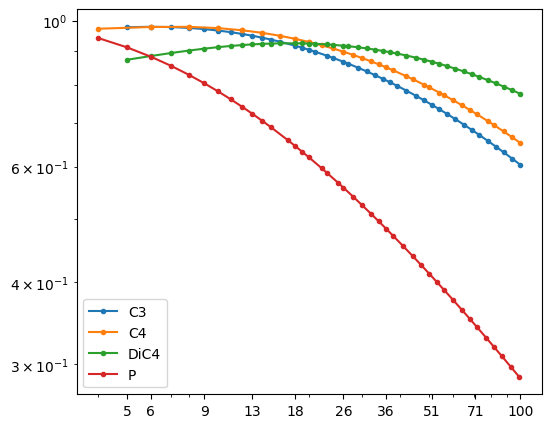

In [2]:
#log log progression
an = Analyzer(mode = "first")
plot_chain_progression_multi_loglog(bounds = (5,100), points = 50, target = "p", analyzer = an, fast = True)

In [2]:
#log log progression
an = Analyzer(mode = "first")
plot_chain_progression_multi_loglog(bounds = (300,1000), points = 50, target = "p", analyzer = an, fast = True)

[ 300  307  315  322  330  339  347  356  365  374  383  393  402  412
  423  433  444  455  466  478  490  502  515  527  541  554  568  582
  596  611  626  642  658  674  691  708  726  744  763  782  801  821
  841  862  884  906  928  952  975 1000]
C3 chain progression: Starting pool creation with 16 process


100%|██████████| 50/50 [00:28<00:00,  1.75it/s]

h(C3^298) collection: Starting pool evaluation with 16 process


Data Setup


34it [01:40,  6.65s/it]

: 

: 

In [2]:
#Asymptotics for C4 chains

unit = QWGraphBuilder.Ring(4)
an = Analyzer(mode = "first")
an.set_opt_mode("fix")
an.set_diag(True)
an.set_gr(unit)
an.set_fix_phi( an.optimum_phase_smart()[0])

cb = CollectionBuilder()


In [3]:
#Asymptotics model for C4 chain

c4model_collection = cb.log_chain_progression(unit, bounds = (4,500), points = 50, analyzer = an)

poly_params = c4model_collection.transport_prob_model() 
custom_params = c4model_collection.transport_prob_model(mode = "custom") 

C4 chain progression: Starting pool creation with 16 process


100%|██████████| 46/46 [00:01<00:00, 31.09it/s] 

h(C4^1) collection: Starting pool evaluation with 16 process


Data Setup


46it [00:06,  7.23it/s]


Evaluation


100%|██████████| 46/46 [00:10<00:00,  4.39it/s]


ax^2:  -0.06140148388291266
bx:  0.24657850322519428
c:  -0.2617540277179173
h(C4^1) collection: Starting pool evaluation with 16 process
Data Setup


46it [00:05,  8.57it/s]


Evaluation


100%|██████████| 46/46 [00:11<00:00,  3.98it/s]


ax:  -0.39210723563774375  +-  0.000154934295694352
b:  1.7197018164330449  +-  0.0071544720536112685
c*1/x:  -1.7960173237450514  +-  0.015481865992172472


In [4]:
x, data = c4model_collection.get_data()

h(C4^1) collection: Starting pool evaluation with 16 process
Data Setup


46it [00:06,  7.38it/s]


Evaluation


100%|██████████| 46/46 [00:11<00:00,  3.89it/s]


1.0375281732495474
0.9806590304124434


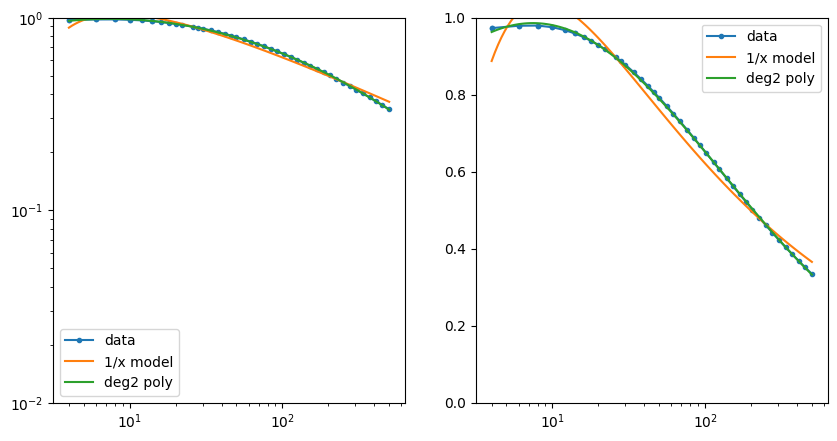

In [5]:
fig, axx = plt.subplots(1,2, figsize = (10,5))

axx[0].plot(x,data, marker = ".", label = "data")
axx[1].plot(x,data, marker = ".", label = "data")

axx[0].set_xscale("log")
axx[0].set_yscale("log")
axx[0].set_ylim(.01,1)

axx[1].set_ylim(0,1)
axx[1].set_xscale("log")

sample = np.geomspace(4, 500, 100)

def custom_model(x,a,b,c):
    return np.exp(a*np.log(x) + b + c/np.log(x))

def poly_model(x,a,b,c):
    return np.exp(a*(np.log(x)**2) + b*np.log(x) + c)

print(custom_model(10, *custom_params))
print(poly_model(10, *poly_params))

custom_data = [custom_model(x, *custom_params) for x in sample]
axx[0].plot(sample, custom_data, label = "1/x model")
axx[1].plot(sample, custom_data, label = "1/x model")

poly_data = [poly_model(x, *poly_params) for x in sample]
axx[0].plot(sample, poly_data, label = "deg2 poly")
axx[1].plot(sample, poly_data, label = "deg2 poly")

axx[0].legend()
axx[1].legend()


In [3]:
my_c = cb.log_chain_progression(unit, bounds = (300,1000), points = 20, analyzer = an)
m,q = my_c.transport_prob_loglog_lm()

h(C4^149) collection: Starting pool evaluation with 16 process
Data Setup


20it [00:30,  1.52s/it]


Evaluation


100%|██████████| 20/20 [17:19<00:00, 51.96s/it]


m:  -0.4981327880788796  +-  0.0030283330964720146
q:  1.995253645911972  +-  0.019123151723843216
r:  -0.9996675373090819


In [2]:
#Asymptotics for C3 chain

unit = QWGraphBuilder.Ring(3)
an = Analyzer(mode = "first")
an.set_opt_mode("fix")
an.set_diag(True)
an.set_gr(unit)
an.set_fix_phi( an.optimum_phase_smart()[0])
print(an.optimum_phase_smart()[0])
print(an.performance_diag(an.optimum_phase_smart()[0]),an.opt_mode, an.diag)

cb = CollectionBuilder()

1.5707963267948966
1.0 fix True


In [11]:
#Asymptotics model for C3 chain

c3model_collection = cb.log_chain_progression(unit, bounds = (4,500), points = 50, analyzer = an)

poly_params = c3model_collection.transport_prob_model() 
custom_params = c3model_collection.transport_prob_model(mode = "custom") 

C3 chain progression: Starting pool creation with 16 process


100%|██████████| 46/46 [00:02<00:00, 21.06it/s] 


h(C3^2) collection: Starting pool evaluation with 16 process
Data Setup


46it [00:09,  4.85it/s] 


Evaluation


100%|██████████| 46/46 [00:19<00:00,  2.32it/s]


ax^2:  -0.0619148909963003
bx:  0.22367287108866332
c:  -0.21878137540972686
h(C3^2) collection: Starting pool evaluation with 16 process
Data Setup


46it [00:09,  4.82it/s]


Evaluation


100%|██████████| 46/46 [00:19<00:00,  2.40it/s]


ax:  -0.4321851956827108  +-  0.00013435517150128622
b:  1.8714223879261374  +-  0.006447619482231326
c*1/x:  -1.9709540863476147  +-  0.014891016016017092


In [12]:
x, data = c3model_collection.get_data()

h(C3^2) collection: Starting pool evaluation with 16 process
Data Setup


46it [00:09,  4.99it/s]


Evaluation


100%|██████████| 46/46 [00:19<00:00,  2.40it/s]


1.0205122581984027
0.9684852748612239


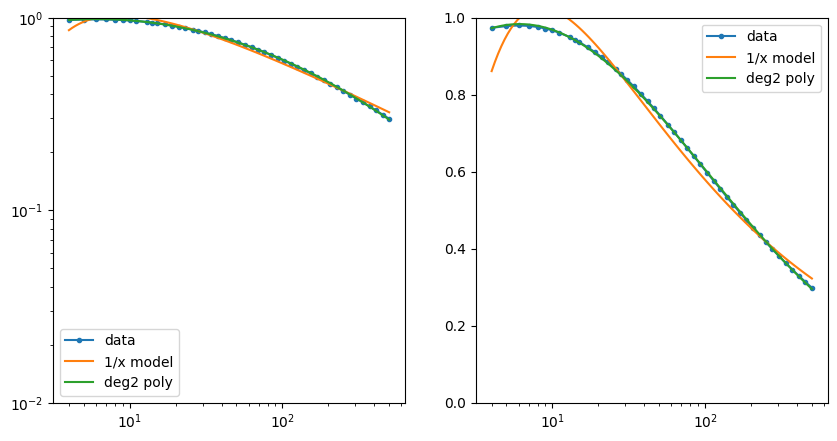

In [13]:
fig, axx = plt.subplots(1,2, figsize = (10,5))

axx[0].plot(x,data,  marker = ".",label = "data")
axx[1].plot(x,data,  marker = ".",label = "data")

axx[0].set_xscale("log")
axx[0].set_yscale("log")
axx[0].set_ylim(.01,1)

axx[1].set_ylim(0,1)
axx[1].set_xscale("log")

sample = np.geomspace(4, 500, 100)

def custom_model(x,a,b,c):
    return np.exp(a*np.log(x) + b + c/np.log(x))

def poly_model(x,a,b,c):
    return np.exp(a*(np.log(x)**2) + b*np.log(x) + c)

print(custom_model(10, *custom_params))
print(poly_model(10, *poly_params))

custom_data = [custom_model(x, *custom_params) for x in sample]
axx[0].plot(sample, custom_data, label = "1/x model")
axx[1].plot(sample, custom_data, label = "1/x model")

poly_data = [poly_model(x, *poly_params) for x in sample]
axx[0].plot(sample, poly_data, label = "deg2 poly")
axx[1].plot(sample, poly_data, label = "deg2 poly")

axx[0].legend()
axx[1].legend()


In [4]:
c3collection = cb.log_chain_progression(unit, bounds = (300,1000), points = 20, analyzer = an)
m,q = c3collection.transport_prob_loglog_lm()

C3 chain progression: Starting pool creation with 16 process


100%|██████████| 20/20 [00:12<00:00,  1.63it/s]

h(C3^298) collection: Starting pool evaluation with 16 process


Data Setup


20it [01:05,  3.28s/it]


Evaluation


100%|██████████| 20/20 [01:57<00:00,  5.89s/it]


m:  -0.5154619216567503  +-  0.002782598774747101
q:  1.9895880419483618  +-  0.017573094189750334
r:  -0.9997378319895491


In [2]:
#Asymptotics for kite chain

unit = QWGraphBuilder.SquareCut()
an = Analyzer(mode = "first")
an.set_opt_mode("fix")
an.set_diag(True)
an.set_gr(unit)
an.set_fix_phi( an.optimum_phase_smart()[0])

cb = CollectionBuilder()


In [7]:
#Asymptotics model for kyte chain

kitemodel_collection = cb.log_chain_progression(unit, bounds = (4,500), points = 50, analyzer = an)

poly_params = kitemodel_collection.transport_prob_model() 
custom_params = kitemodel_collection.transport_prob_model(mode = "custom") 

DiC4 chain progression: Starting pool creation with 16 process


100%|██████████| 46/46 [00:06<00:00,  7.31it/s] 

h(DiC4^2) collection: Starting pool evaluation with 16 process


Data Setup


46it [00:29,  1.58it/s]


Evaluation


100%|██████████| 46/46 [00:43<00:00,  1.05it/s]


ax^2:  -0.05666246078807699
bx:  0.3140660093145328
c:  -0.5059936023740591
h(DiC4^2) collection: Starting pool evaluation with 16 process
Data Setup


46it [00:28,  1.64it/s]


Evaluation


100%|██████████| 46/46 [00:42<00:00,  1.09it/s]


ax:  -0.28083459335343836  +-  0.00016046804390728022
b:  1.368000668835859  +-  0.007700759630047324
c*1/x:  -1.7429335191508482  +-  0.017785189584653915


In [8]:
x, data = kitemodel_collection.get_data()

h(DiC4^2) collection: Starting pool evaluation with 16 process
Data Setup


46it [00:25,  1.79it/s]


Evaluation


100%|██████████| 46/46 [00:44<00:00,  1.04it/s]


0.9650346330576485
0.9201224822705769


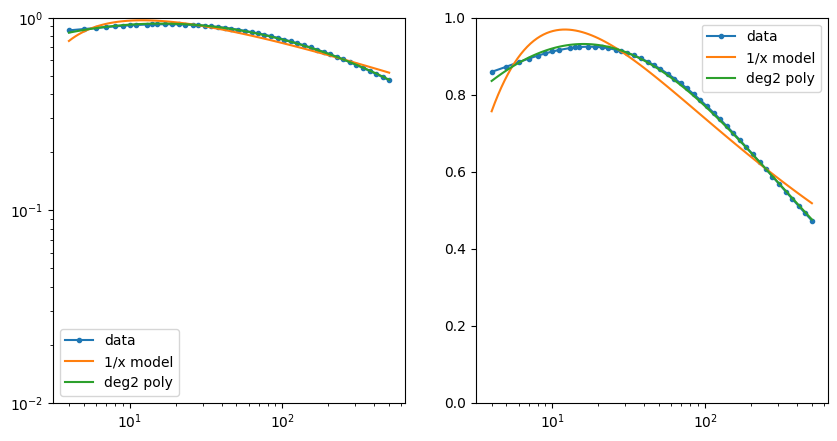

In [9]:
fig, axx = plt.subplots(1,2, figsize = (10,5))

axx[0].plot(x,data, marker = ".", label = "data")
axx[1].plot(x,data, marker = ".", label = "data")

axx[0].set_xscale("log")
axx[0].set_yscale("log")
axx[0].set_ylim(.01,1)

axx[1].set_ylim(0,1)
axx[1].set_xscale("log")

sample = np.geomspace(4, 500, 100)

def custom_model(x,a,b,c):
    return np.exp(a*np.log(x) + b + c/np.log(x))

def poly_model(x,a,b,c):
    return np.exp(a*(np.log(x)**2) + b*np.log(x) + c)

print(custom_model(10, *custom_params))
print(poly_model(10, *poly_params))

custom_data = [custom_model(x, *custom_params) for x in sample]
axx[0].plot(sample, custom_data, label = "1/x model")
axx[1].plot(sample, custom_data, label = "1/x model")

poly_data = [poly_model(x, *poly_params) for x in sample]
axx[0].plot(sample, poly_data, label = "deg2 poly")
axx[1].plot(sample, poly_data, label = "deg2 poly")

axx[0].legend()
axx[1].legend()

In [3]:
kiteCollection = cb.log_chain_progression(unit, bounds = (300,1000), points = 20, analyzer = an)
m,q = kiteCollection.transport_prob_loglog_lm()

DiC4 chain progression: Starting pool creation with 16 process


100%|██████████| 20/20 [00:26<00:00,  1.34s/it]

h(DiC4^298) collection: Starting pool evaluation with 16 process


Data Setup


20it [03:55, 11.80s/it]


Evaluation


 30%|███       | 6/20 [00:56<02:07,  9.12s/it]

: 

: 

In [5]:
cb = CollectionBuilder()
an = Analyzer(mode = "first")
line_collection = cb.log_progression("P", bounds = (300,1000), points = 20, analyzer = an)
line_param = line_collection.transport_prob_loglog_lm()

P progression: Starting pool creation with 16 process


100%|██████████| 20/20 [00:01<00:00, 10.01it/s]


P300 collection: Starting pool evaluation with 16 process
Data Setup


20it [00:07,  2.77it/s]


Evaluation


100%|██████████| 20/20 [00:26<00:00,  1.31s/it]


m:  -0.6293224030904141  +-  0.0009508888997840026
q:  1.6943487168184386  +-  0.006003382391947876
r:  -0.9999794532898261
